### Gerry William Nanlohy / 2440018854 / LB01 / Assignment 07

##### Importing Data from Various Sources

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading Excel Files

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
dataset.shape

(400, 3)

##### Data Reading

In [4]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
print(dataset)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
dataset.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [8]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### Data Processing

In [9]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [10]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
print ('Training set : ', x_train.shape, y_train.shape)
print ('Testing set : ', x_test.shape, y_test.shape)

Training set :  (320, 2) (320,)
Testing set :  (80, 2) (80,)


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
sc = MinMaxScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

In [16]:
x_train_scaled_dataset = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled_dataset = pd.DataFrame(x_test_scaled, columns = x_test.columns)

#### Predict Purchased (1) or Not Purchased (0) using K-NN Classifier with Minkowski Distance Metric.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski')
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
print('Accuracy Score : ', accuracy_score(y_test, y_pred))

Accuracy Score :  0.95


In [21]:
from sklearn import metrics

In [22]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train_scaled, y_train)
    y_pred=neigh.predict(x_test_scaled)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)
    std_acc[n-1] = np.std(y_pred == y_test)/np.sqrt(y_pred.shape[0])

In [23]:
print(mean_acc)

[0.8875 0.8875 0.95   0.95   0.95   0.95   0.95   0.95   0.95   0.95
 0.95   0.95   0.95   0.95   0.95   0.95   0.95   0.95   0.95   0.95
 0.95   0.95   0.95   0.95   0.95   0.95   0.95   0.95   0.95  ]


In [24]:
k_accuracy = pd.DataFrame()
k_accuracy['numberNeighbors'] = range(1, Ks)
k_accuracy['Accuracy'] = mean_acc

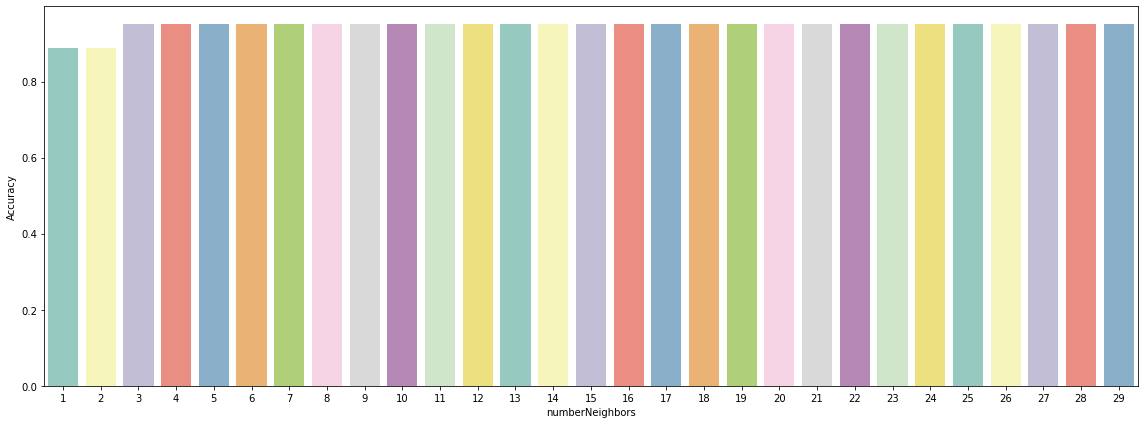

In [25]:
plt.figure(figsize=(16, 6))
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
sns.barplot(x=k_accuracy['numberNeighbors'], y=k_accuracy['Accuracy'], data=k_accuracy, palette='Set3')
plt.tight_layout()
plt.show()

In [26]:
final_model = KNeighborsClassifier(n_neighbors = 4, metric ='minkowski')
final_model.fit(x_train_scaled, y_train)
y_pred = final_model.predict(x_test_scaled)

In [27]:
print('Final Accuracy Score : ', accuracy_score(y_test, y_pred))

Final Accuracy Score :  0.95


#### Calculated Accuracy Score using Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[55  3]
 [ 1 21]]


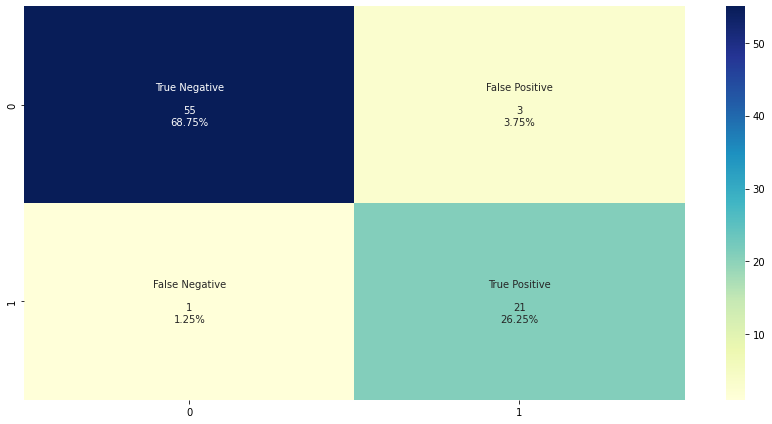

In [30]:
plt.figure(figsize=(12, 6))
group_names = ['True Negative\n','False Positive\n','False Negative\n','True Positive\n']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu')
plt.tight_layout()
plt.show()

In [31]:
TN = 55
FP = 3
FN = 1
TP = 21
def calculateAccuracy(trueNeg, falsePos, falseNeg, truePos):
  return (trueNeg + truePos) / (trueNeg + falsePos + truePos + falseNeg)
cf_accuracy = calculateAccuracy(TN, FP, FN, TP)

In [32]:
print('Confussion Matrix Accuracy Score : ', cf_accuracy)

Confussion Matrix Accuracy Score :  0.95


#### Visualising the Training and Test set results

In [33]:
import warnings
from matplotlib.colors import ListedColormap

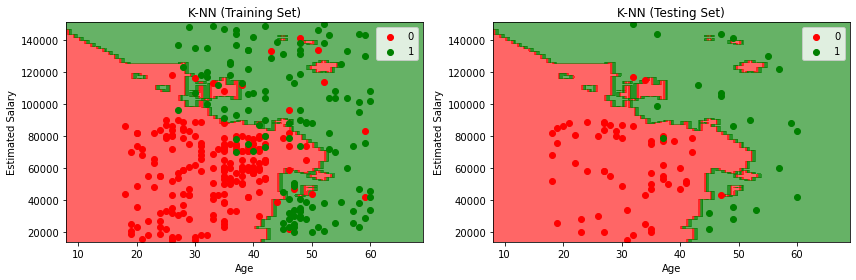

In [34]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize = (12,4))

    plt.subplot(1,2,1)
    x_set, y_set = sc.inverse_transform(x_train_scaled), y_train
    x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 1),
                        np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 1))
    plt.contourf(x1, x2, final_model.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    for i, j in enumerate(np.unique(y_set)):
      plt.scatter (x_set[y_set == j, 0], x_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)

    plt.title('K-NN (Training Set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()

    plt.subplot(1,2,2)
    x_set, y_set = sc.inverse_transform(x_test_scaled), y_test
    x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0]. min() - 10, stop = x_set[:, 0].max() + 10, step = 1),
                        np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 1))
    plt.contourf(x1, x2, final_model.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    for i, j in enumerate(np.unique(y_set)):
      plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)

    plt.title('K-NN (Testing Set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.tight_layout()
    plt.show()

#### End of Code